In [ ]:
from standardInclude import *

In [ ]:
paths = {"EndGame":"/home/jlab/g-2/caloTrackMatching/data/endgame/",
         "Run 2C" :"/home/jlab/g-2/caloTrackMatching/data/run2c/"}

allfiles = {}
for name,path in paths.items():
    print(name,path)
    files = os.listdir(path)
    #print(files)
    names = [x.split("_")[0] for x in files]
    #print(names)

    fs = {}
    for file in files:
        namei = file.split("_")[0]
        fs[namei] = r.TFile(path+file)
        #fs[namei].ls()
    allfiles[name] = fs
print(allfiles)

In [ ]:
allFitResults = {}

In [ ]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

---

# Now lets generate comparison plots 

### Tracker

In [83]:
tlow = 5
thigh = 600
station = 12
calo = station +1
func_to_use = {"EndGame":0, "Run 2C":0}

#which file to pull the data from
namei = 'tracks'

#which plot within the file to plot
#toplot = "trackerBeamPosRand"
toplot = "trackerCaloPosRand"

In [84]:
fits = {}
for name in paths:
    print("Starting:",name)
    fs = allfiles[name]
    func,paramVec = fitfunc(func_to_use[name], [tlow,thigh]) 
    f = fs[namei]
    f.ls()
    
    h = f.Get(toplot).Clone()
    h.Rebin3D(1,1,1)
    h.GetZaxis().SetRange(h.GetZaxis().FindBin(station),h.GetZaxis().FindBin(station))
    h.GetYaxis().SetRange(h.GetYaxis().FindBin(-50),h.GetYaxis().FindBin(50))
    widthDict = getWidths(h.Project3D("yx"))
    
    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    fits[name] = fitresult

Starting: EndGame
Starting: Run 2C
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/tracks_eg.root	
  OBJ: TH3I	trackerCaloPosRand	Tracker Calo Face Position vs. Rand Time : 0 at: 0x5596b92f03d0
  OBJ: TH3I	trackerCaloPos	Tracker Calo Face Position vs. Time : 0 at: 0x5596ba946bf0
  KEY: TH3I	trackerBeamPos;1	Tracker Beam Position vs. Time
  KEY: TH3I	trackerCaloPos;1	Tracker Calo Face Position vs. Time
  KEY: TH3I	trackerBeamPosRand;1	Tracker Beam Position vs. Rand Time
  KEY: TH3I	trackerCaloPosRand;1	Tracker Calo Face Position vs. Rand Time
  KEY: TH3I	trackerCaloPos_noRadialField;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
  KEY: TH3I	trackerCaloPos_noRadialFieldRand;1	Tracker Calo Face Position [Straight Line Extrapolation] vs. Time
TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/tracks_run2c.root	
  OBJ: T

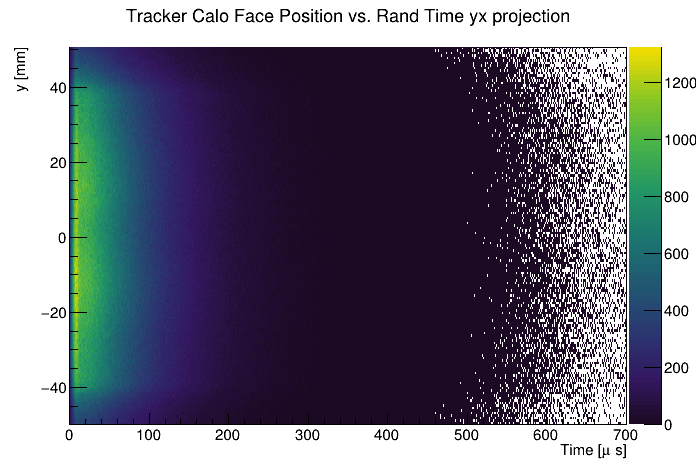

In [85]:
c = r.TCanvas()
h.Project3D("yx").Draw("colz")
c.Draw()

In [86]:
print(fits)

{'EndGame': <python_fit.fitVector object at 0x7f62d1658ad0>, 'Run 2C': <python_fit.fitVector object at 0x7f62d1b94750>}


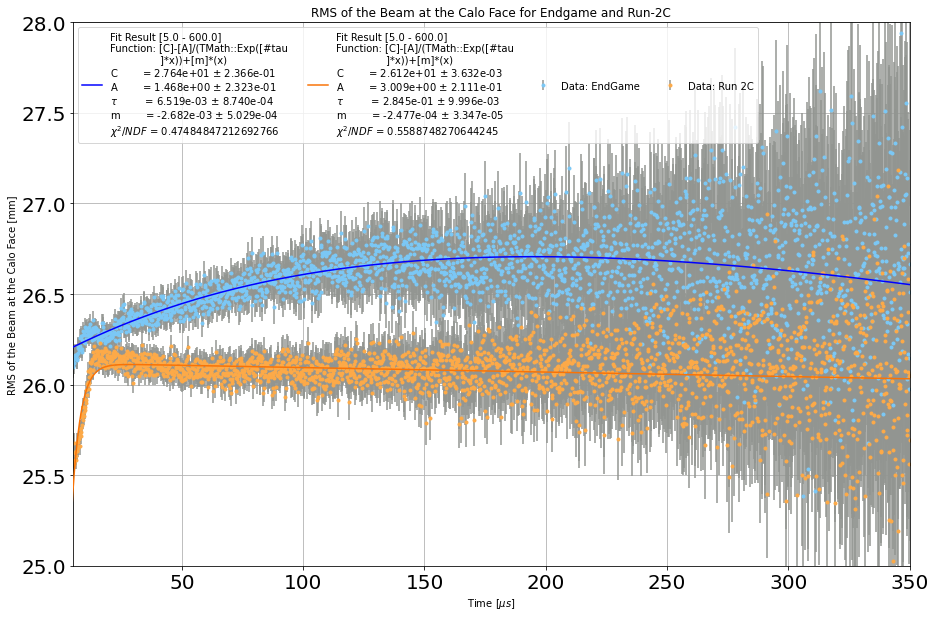

In [88]:
fig,ax = plt.subplots(figsize=(15,10))
fig, ax = compareFits(fits,fig,ax,fmti=".")
plt.ylim(25,28)
plt.xlim(5,350)
plt.legend(ncol=4)
plt.xlabel(r"Time [$\mu s$]")
plt.ylabel("RMS of the Beam at the Calo Face [mm]")
plt.title("RMS of the Beam at the Calo Face for Endgame and Run-2C")
plt.show()

---

### Clusters

In [63]:
tlow = 5
thigh = 300
func_to_use = {"EndGame":0, "Run 2C":0}

#which file to pull the data from
namei = 'clusters'

#which plot within the file to plot
#toplot = "trackerBeamPosRand"
toplot = "randclusters"+str(calo)

In [67]:
fits = {}
for name in paths:
    print("Starting:",name)
    fs = allfiles[name]
    func,paramVec = fitfunc(func_to_use[name], [tlow,thigh]) 
    f = fs[namei]
    f.ls()
    
    h = f.Get(toplot).Clone()
    h.GetYaxis().SetRange(h.GetYaxis().FindBin(1000),h.GetYaxis().FindBin(2400))
    h.Rebin3D(1,1,1)
    widthDict = getWidths(h.Project3D("zx"), scale=25, offset=3)
    
    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    fits[name] = fitresult

Starting: EndGame
Starting: Run 2C
TFile**		/home/jlab/g-2/caloTrackMatching/data/endgame/clusters_eg.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/endgame/clusters_eg.root	
  OBJ: TH3F	randclusters13	time randomized clusters : 0 at: 0x5596ba2d38e0
  KEY: TH3F	clusters13;1	clusters
  KEY: TH3F	randclusters13;1	time randomized clusters
  KEY: TH3F	clusters19;1	clusters
  KEY: TH3F	randclusters19;1	time randomized clusters
TFile**		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
 TFile*		/home/jlab/g-2/caloTrackMatching/data/run2c/clusters_run2c.root	
  OBJ: TH3F	randclusters13	time randomized clusters : 0 at: 0x5596ba2b8130
  KEY: TH3F	clusters13;1	clusters
  KEY: TH3F	randclusters13;1	time randomized clusters
  KEY: TH3F	clusters19;1	clusters
  KEY: TH3F	randclusters19;1	time randomized clusters


In [68]:
print(fits)

{'EndGame': <python_fit.fitVector object at 0x7f62d3de5190>, 'Run 2C': <python_fit.fitVector object at 0x7f62d9213fd0>}


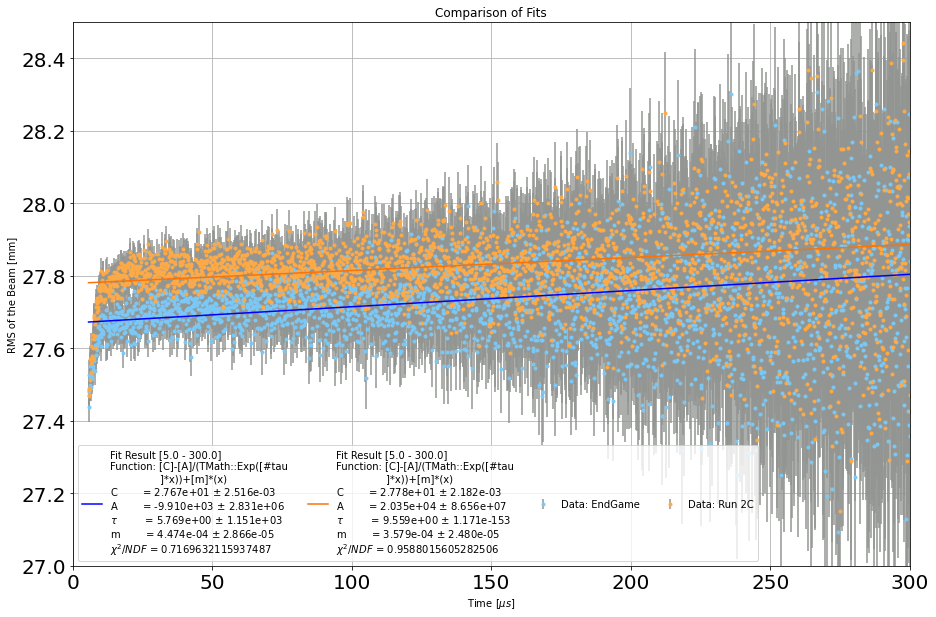

In [70]:
fig,ax = plt.subplots(figsize=(15,10))
fig, ax = compareFits(fits,fig,ax,fmti=".")
plt.ylim(27,28.5)
plt.xlim(0,300)
plt.legend(ncol=4)
plt.xlabel(r"Time [$\mu s$]")
plt.ylabel("RMS of the Beam [mm]")
plt.show()

---

# Now how about within each dataset

In [15]:
tlow = 25
thigh = 600
func_to_use = {"EndGame":0, "Run 2C":0}

#which file to pull the data from
dataset = "EndGame"
namei = 'tracks'

#which plot within the file to plot
#toplot = "trackerBeamPosRand"
toplot = {"trackerCaloPosRand":0, "randclusters"+str(calo):0}
whichfile={'trackerCaloPosRand':'tracks', "randclusters"+str(calo):'clusters'}

In [16]:
fits = {}
for name in toplot:
    func,paramVec = fitfunc(toplot[name], [tlow,thigh]) 
    fs = allfiles[dataset]
    f = fs[whichfile[name]]
    
    if("trackerCaloPos" in name):
        h = f.Get(name).Clone()
        h.GetZaxis().SetRange(h.GetZaxis().FindBin(station),h.GetZaxis().FindBin(station))
        widthDict = getWidths(h.Project3D("yx"))
    elif("clusters" in name):
        h = f.Get(name).Clone()
        h.GetYaxis().SetRange(h.GetYaxis().FindBin(1000),h.GetYaxis().FindBin(2400))
        widthDict = getWidths(h.Project3D("zx"), scale=25, offset=3)
    else:
        raise ValueError("ERROR: Bahaviour not defined for "+name)
        
    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    fits[name] = fitresult

In [17]:
print(fits)

{'trackerCaloPosRand': <python_fit.fitVector object at 0x7fdba4f9d5d0>, 'randclusters13': <python_fit.fitVector object at 0x7fdba4d7f5d0>}


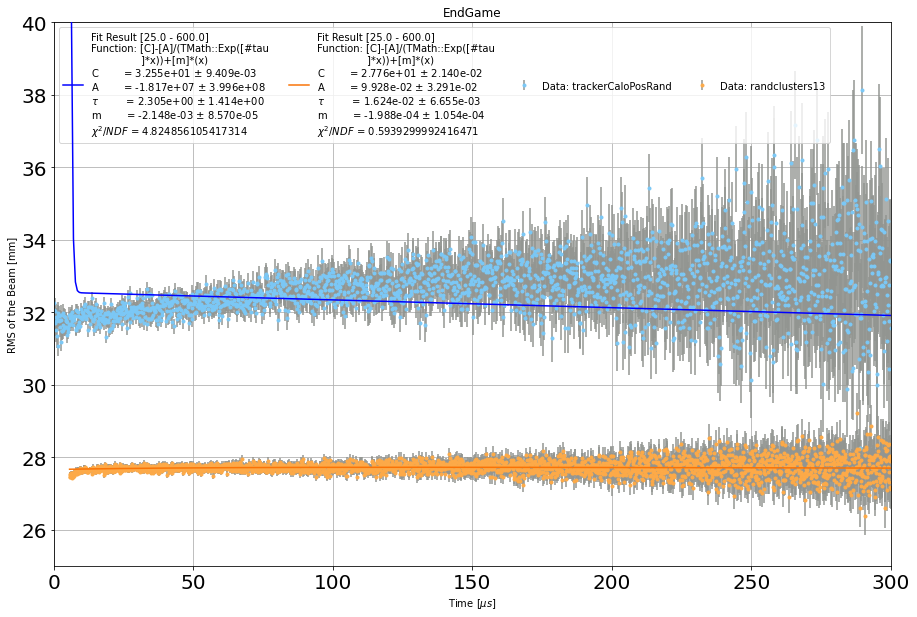

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
fig, ax = compareFits(fits,fig,ax,fmti=".")
plt.ylim(25,40)
plt.xlim(0,300)
plt.legend(ncol=4)
plt.title(dataset)
plt.xlabel(r"Time [$\mu s$]")
plt.ylabel("RMS of the Beam [mm]")
plt.show()

---

### Compare random and non-random

In [5]:
tlow = 25
thigh = 600
station = 12
calo = station +1

#which file to pull the data from
dataset = "EndGame"
namei = 'tracks'

#which plot within the file to plot
#toplot = "trackerBeamPosRand"
toplot = {"trackerCaloPos":0, "trackerCaloPosRand":0}

In [6]:
fits = {}
for name in toplot:
    func,paramVec = fitfunc(toplot[name], [tlow,thigh]) 
    fs = allfiles[dataset]
    f = fs[namei]
    
    if("trackerCaloPos" in name):
        h = f.Get(name).Clone()
        h.GetZaxis().SetRange(h.GetZaxis().FindBin(station),h.GetZaxis().FindBin(station))
        h.Rebin3D(1,1,1)
        widthDict = getWidths(h.Project3D("yx"))
    elif("clusters" in name):
        h = f.Get(name).Clone()
        h.GetYaxis().SetRange(h.GetYaxis().FindBin(1000),h.GetYaxis().FindBin(2400))
        widthDict = getWidths(h.Project3D("zx"), scale=25, offset=3)
    else:
        raise ValueError("ERROR: Bahaviour not defined for "+name)
    
        
    fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
    fits[name] = fitresult

In [7]:
print(fits)

{'trackerCaloPos': <python_fit.fitVector object at 0x7fd6c00d51d0>, 'trackerCaloPosRand': <python_fit.fitVector object at 0x7fd677383d50>}


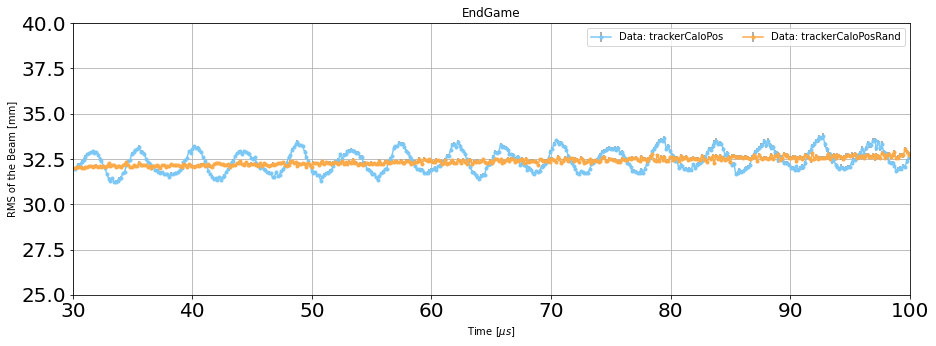

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
fig, ax = compareFits(fits,fig,ax,fmti=".-",drawFits=False)
plt.ylim(25,40)
plt.xlim(30,100)
plt.legend(ncol=4)
plt.title(dataset)
plt.xlabel(r"Time [$\mu s$]")
plt.ylabel("RMS of the Beam [mm]")
plt.show()